In [ ]:
import cv2
import os
from tqdm import tqdm_notebook
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
from numpy import load

X_val = load('/content/drive/MyDrive/Sem-2/CV/Project/X_val.npy')
X_test = load('/content/drive/MyDrive/Sem-2/CV/Project/X_test.npy')
X_train = load('/content/drive/MyDrive/Sem-2/CV/Project/X_train.npy')

print("Training Size = ",X_train.shape)
print("Val Size = ",X_val.shape)
print("Testing Size = ",X_test.shape)




Y_val = load('/content/drive/MyDrive/Sem-2/CV/Project/Y_val.npy')
Y_test = load('/content/drive/MyDrive/Sem-2/CV/Project/Y_test.npy')
Y_train = load('/content/drive/MyDrive/Sem-2/CV/Project/Y_train.npy')


print("Y - Training Size = ",Y_train.shape)
print("Y - Val Size = ",Y_val.shape)
print("Y - Testing Size = ",Y_test.shape)

Training Size =  (34383, 81, 81, 3)
Val Size =  (11462, 81, 81, 3)
Testing Size =  (11462, 81, 81, 3)
Y - Training Size =  (34383,)
Y - Val Size =  (11462,)
Y - Testing Size =  (11462,)


In [ ]:
X_train = X_train.reshape(len(X_train),81*81*3)
print(X_train.shape)
X_test = X_test.reshape(len(X_test),81*81*3)
print(X_test.shape)

(34383, 19683)
(11462, 19683)


In [ ]:
X_train = X_train[:5000]
X_test = X_test[:5000]
Y_train = Y_train[:5000]
Y_test = Y_test[:5000]

In [ ]:
from sklearn import svm
svm1 = svm.SVC(kernel='linear', C = 0.01)
svm1.fit(X_train[:4000],Y_train[:4000])
#SVC(C=0.01, kernel='linear')
#y_train_pred = svm1.predict(X_train)
#y_test_pred = svm1.predict(X_test)
#y_test_pred

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_train_pred = svm1.predict(X_train[:2000])
y_test_pred = svm1.predict(X_test[:2000])
y_test_pred


array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(Y_test[:2000],y_test_pred)


array([[1045,  302],
       [ 171,  482]])

In [ ]:
print("Testing Accuracy",accuracy_score(Y_test[:2000],y_test_pred))
print("Training Accuracy",accuracy_score(Y_train[:2000],y_train_pred))

Testing Accuracy 0.7635
Training Accuracy 1.0


In [ ]:
cf1 = confusion_matrix(Y_test[:2000],y_test_pred)
cf2 = confusion_matrix(Y_train[:2000],y_train_pred)

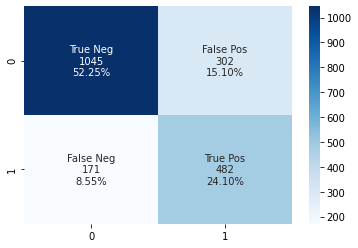

In [ ]:
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf1.flatten()/np.sum(cf1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf1, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(Y_test[:2000], y_test_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(Y_test[:2000], y_test_pred, average='binary')
print('Recall: %.3f' % recall)

Precision: 0.615
Recall: 0.738


In [ ]:
del y_test_pred,y_train_pred,svm1

In [ ]:
svm2 = svm.SVC(kernel='rbf', C = 0.01)
svm2.fit(X_train[:2000],Y_train[:2000])

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_train_pred = svm2.predict(X_train[:400])
y_test_pred = svm2.predict(X_test[:400])
y_test_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
confusion_matrix(Y_test[:400],y_test_pred)

array([[260,   0],
       [140,   0]])

In [ ]:
del Y_val,X_val

In [ ]:
del svm2,y_train_pred,y_test_pred

In [ ]:
svm3 = svm.SVC(kernel='poly')
svm3.fit(X_train[:4000],Y_train[:4000])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_train_pred = svm3.predict(X_train[:2000])
y_test_pred = svm3.predict(X_test[:2000])
y_test_pred


array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
print("Train Accuracy = ",accuracy_score(Y_train[:2000],y_train_pred))
print("Test Accuracy = ",accuracy_score(Y_test[:2000],y_test_pred))
cf1 = confusion_matrix(Y_test[:2000],y_test_pred)
cf2 = confusion_matrix(Y_train[:2000],y_train_pred)

Train Accuracy =  0.967
Test Accuracy =  0.8365


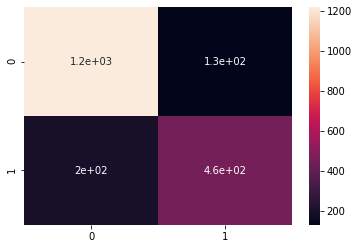

In [ ]:
import seaborn as sns
sns.heatmap(cf1, annot=True)

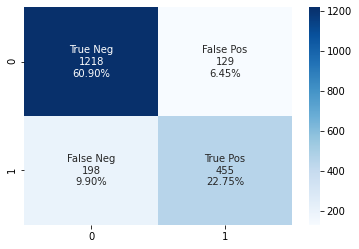

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf1.flatten()/np.sum(cf1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf1, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(Y_test[:2000], y_test_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(Y_test[:2000], y_test_pred, average='binary')
print('Recall: %.3f' % recall)

Precision: 0.779
Recall: 0.697
